In [1]:
# Import Dependencies
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read data from csv
full_df = pd.read_csv("full_df.csv")

In [4]:
# Display full_df
full_df.head(10)

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2012,123,104,19,0,0,0,0,77,53,28,0,0,0,109,14
1,"Aberdeen, WA",10140,2012,366,348,18,0,0,0,0,81,42,20,0,0,0,366,0
2,"Adjuntas, PR",10260,2012,77,74,3,0,0,0,0,66,36,18,0,0,0,77,0
3,"Adrian, MI",10300,2012,243,142,76,21,4,0,0,187,101,48,0,0,174,69,0
4,"Akron, OH",10420,2012,366,186,173,6,1,0,0,164,78,50,81,0,98,187,0
5,"Albany, GA",10500,2012,360,254,104,2,0,0,0,124,63,38,0,0,0,359,1
6,"Albany, OR",10540,2012,366,319,47,0,0,0,0,91,53,23,0,0,0,366,0
7,"Albany-Schenectady-Troy, NY",10580,2012,366,294,64,8,0,0,0,143,60,39,1,0,272,93,0
8,"Albuquerque, NM",10740,2012,366,100,241,23,1,1,0,291,96,60,0,2,228,105,31
9,"Alexandria, LA",10780,2012,362,177,185,0,0,0,0,88,66,52,0,0,0,362,0


In [5]:
#check types
full_df.dtypes

CBSA                                   object
CBSA Code                               int64
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object

In [6]:
# view columns
full_df.columns

Index(['CBSA', 'CBSA Code', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [7]:
# Check Record Count (should = 5680 rows)
len(full_df.index)

5680

In [8]:
# Determine Top 5 Worst AQI Cities
Worst_AQI = full_df.groupby(["Year","CBSA"])["Median AQI"].mean().sort_values(ascending=False)
Worst_AQI.head(5)

Year  CBSA                                
2021  Phoenix-Mesa-Scottsdale, AZ             123.0
2020  Phoenix-Mesa-Scottsdale, AZ             119.0
2012  Riverside-San Bernardino-Ontario, CA    100.0
2020  Riverside-San Bernardino-Ontario, CA     98.0
2017  Riverside-San Bernardino-Ontario, CA     98.0
Name: Median AQI, dtype: float64

In [9]:
# Determine Top 5 Best AQI Cities
Best_AQI = full_df.groupby(["Year","CBSA"])["Median AQI"].mean().sort_values(ascending=True)
Best_AQI.head(5)

Year  CBSA          
2022  Moscow, ID        0.0
      Danville, VA      3.0
      Pierre, SD        3.0
2021  Danville, VA      3.0
2013  Dodge City, KS    6.0
Name: Median AQI, dtype: float64

In [187]:
#view as dataframe
combined_AQI1 = pd.DataFrame(Worst_AQI)
combined_AQI1.head(10)

Median AQI
Year CBSA                                            
2021 Phoenix-Mesa-Scottsdale, AZ                123.0
2020 Phoenix-Mesa-Scottsdale, AZ                119.0
2012 Riverside-San Bernardino-Ontario, CA       100.0
2020 Riverside-San Bernardino-Ontario, CA        98.0
2017 Riverside-San Bernardino-Ontario, CA        98.0
2013 Riverside-San Bernardino-Ontario, CA        97.0
2021 Riverside-San Bernardino-Ontario, CA        97.0
2014 Riverside-San Bernardino-Ontario, CA        97.0
     Bakersfield, CA                             97.0
2015 Riverside-San Bernardino-Ontario, CA        97.0

In [211]:
#clean up data frame by resetting index
combined_AQI= combined_AQI1.reset_index()
combined_AQI.head()

,Year,CBSA,Median AQI
0,2021,"Phoenix-Mesa-Scottsdale, AZ",123.0
1,2020,"Phoenix-Mesa-Scottsdale, AZ",119.0
2,2012,"Riverside-San Bernardino-Ontario, CA",100.0
3,2020,"Riverside-San Bernardino-Ontario, CA",98.0
4,2017,"Riverside-San Bernardino-Ontario, CA",98.0


In [212]:
#view outlier values
combined_AQI.groupby("CBSA").size().sort_values(ascending=True).head(20)


CBSA
Laurel, MS                1
Ada, OK                   1
Cleveland, TN             1
Elmira, NY                1
Kingston, NY              1
Helena-West Helena, AR    1
Vermillion, SD            1
Russellville, AR          1
Shawnee, OK               1
Breckenridge, CO          1
Danville, VA              2
Crawfordsville, IN        2
Gallup, NM                2
Manhattan, KS             2
Beatrice, NE              2
Jonesboro, AR             2
Silver City, NM           3
Jamestown, ND             3
Wichita Falls, TX         3
Montrose, CO              3
dtype: int64

In [213]:
#drop outlier values less than 2
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Laurel, MS"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Russellville, AR"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Elmira, NY"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Breckenridge, CO"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Shawnee, OK"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Helena-West Helena, AR"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Kingston, NY"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Vermillion, SD"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Cleveland, TN"].index,inplace=True)
combined_AQI.drop(combined_AQI[combined_AQI['CBSA'] =="Ada, OK"].index,inplace=True)

In [214]:
# add CBSA columns back into dataframe
combined_AQI_CBSA = combined_AQI['CBSA']

In [215]:
# create one hot encoding
combined_AQI = pd.get_dummies(combined_AQI, prefix="city", columns=["CBSA"])

In [216]:
#confirm the cities have been broken out
combined_AQI.describe()

,Year,Median AQI,"city_Aberdeen, SD","city_Aberdeen, WA","city_Adjuntas, PR","city_Adrian, MI","city_Akron, OH","city_Albany, GA","city_Albany, OR","city_Albany-Schenectady-Troy, NY",...,"city_Wilmington, OH","city_Winchester, VA-WV","city_Winona, MN","city_Winston-Salem, NC","city_Worcester, MA-CT","city_Yakima, WA","city_York-Hanover, PA","city_Youngstown-Warren-Boardman, OH-PA","city_Yuba City, CA","city_Yuma, AZ"
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,...,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,2016.953263,38.323986,0.001940,0.001940,0.001764,0.001940,0.001940,0.001940,0.001940,0.001940,...,0.001940,0.001940,0.001764,0.001940,0.001940,0.001940,0.001940,0.001940,0.001940,0.001940
std,3.148038,10.954869,0.044007,0.044007,0.041963,0.044007,0.044007,0.044007,0.044007,0.044007,...,0.044007,0.044007,0.041963,0.044007,0.044007,0.044007,0.044007,0.044007,0.044007,0.044007
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
combined_AQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 0 to 5679
Columns: 546 entries, Year to city_Yuma, AZ
dtypes: float64(1), int64(1), uint8(544)
memory usage: 3.1 MB


In [194]:
# Break into targets and features
X = combined_AQI.drop("Median AQI", axis=1)
y = combined_AQI['Median AQI']

In [195]:
# view columns
X.columns

Index(['Year', 'city_Aberdeen, SD', 'city_Aberdeen, WA', 'city_Adjuntas, PR',
       'city_Adrian, MI', 'city_Akron, OH', 'city_Albany, GA',
       'city_Albany, OR', 'city_Albany-Schenectady-Troy, NY',
       'city_Albuquerque, NM',
       ...
       'city_Wilmington, OH', 'city_Winchester, VA-WV', 'city_Winona, MN',
       'city_Winston-Salem, NC', 'city_Worcester, MA-CT', 'city_Yakima, WA',
       'city_York-Hanover, PA', 'city_Youngstown-Warren-Boardman, OH-PA',
       'city_Yuba City, CA', 'city_Yuma, AZ'],
      dtype='object', length=545)

In [196]:
# Check the balance of our target values
y.value_counts()

38.0     375
40.0     359
44.0     351
39.0     294
43.0     288
        ... 
83.0       1
87.0       1
90.0       1
100.0      1
0.0        1
Name: Median AQI, Length: 85, dtype: int64

In [197]:
#import linear regression dependencies
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(4252, 545)

In [198]:
#training linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [223]:
# View data columns
X.columns

Index(['Year', 'city_Aberdeen, SD', 'city_Aberdeen, WA', 'city_Adjuntas, PR',
       'city_Adrian, MI', 'city_Akron, OH', 'city_Albany, GA',
       'city_Albany, OR', 'city_Albany-Schenectady-Troy, NY',
       'city_Albuquerque, NM',
       ...
       'city_Wilmington, OH', 'city_Winchester, VA-WV', 'city_Winona, MN',
       'city_Winston-Salem, NC', 'city_Worcester, MA-CT', 'city_Yakima, WA',
       'city_York-Hanover, PA', 'city_Youngstown-Warren-Boardman, OH-PA',
       'city_Yuba City, CA', 'city_Yuma, AZ'],
      dtype='object', length=545)

In [227]:
# matched to coefficients of the numbers below
X.iloc[0]

Year                                      2021
city_Aberdeen, SD                            0
city_Aberdeen, WA                            0
city_Adjuntas, PR                            0
city_Adrian, MI                              0
                                          ... 
city_Yakima, WA                              0
city_York-Hanover, PA                        0
city_Youngstown-Warren-Boardman, OH-PA       0
city_Yuba City, CA                           0
city_Yuma, AZ                                0
Name: 0, Length: 545, dtype: int64

In [199]:
#print the coefficients of the model
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [-3.50058521e-01 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10 -8.09538946e+10
 -8.09538

In [200]:
#predict X_test set from data
predictions = lin_reg.predict(X_test)

In [201]:
#check size
y_test.shape

(1418,)

Text(0, 0.5, 'Predicted Y')

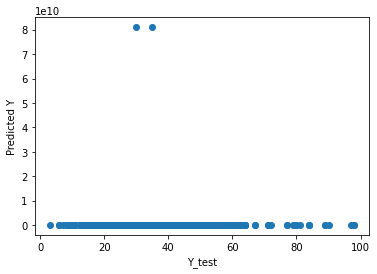

In [202]:
#real test values versus predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

In [203]:
#evaluate the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 114180389.99378651
MSE: 9.243347041017346e+18
RMSE: 3040287328.694008


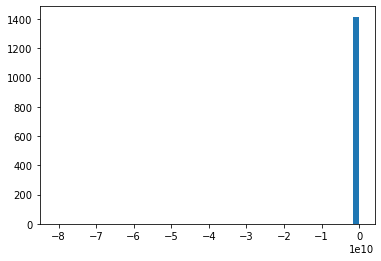

In [204]:
#check for distribution
plt.hist((y_test-predictions),bins=50);

In [282]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions = lin_reg.predict(X)
predictions

array([84.61880789, 84.96410592, 96.63558104, ...,  3.17264901,
        2.82735099,  8.87709927])

In [217]:
# put predictions and CBSA into columns
combined_AQI["Predicted AQI"]=predictions
combined_AQI["CBSA"]=combined_AQI_CBSA

In [218]:
# view columns
X.columns

Index(['Year', 'city_Aberdeen, SD', 'city_Aberdeen, WA', 'city_Adjuntas, PR',
       'city_Adrian, MI', 'city_Akron, OH', 'city_Albany, GA',
       'city_Albany, OR', 'city_Albany-Schenectady-Troy, NY',
       'city_Albuquerque, NM',
       ...
       'city_Wilmington, OH', 'city_Winchester, VA-WV', 'city_Winona, MN',
       'city_Winston-Salem, NC', 'city_Worcester, MA-CT', 'city_Yakima, WA',
       'city_York-Hanover, PA', 'city_Youngstown-Warren-Boardman, OH-PA',
       'city_Yuba City, CA', 'city_Yuma, AZ'],
      dtype='object', length=545)

In [220]:
# Organize new df
combined_AQI = combined_AQI[["Year","CBSA","Median AQI", "Predicted AQI"]]

In [244]:
# call out bakersfield, CA
combined_AQI.loc[combined_AQI["CBSA"]=='Bakersfield, CA']

,Year,CBSA,Median AQI,Predicted AQI
8,2014,"Bakersfield, CA",97.0,82.035894
12,2013,"Bakersfield, CA",89.0,82.381192
15,2012,"Bakersfield, CA",84.0,82.726490
17,2018,"Bakersfield, CA",84.0,80.654702
19,2017,"Bakersfield, CA",84.0,81.000000
20,2015,"Bakersfield, CA",84.0,81.690596
23,2021,"Bakersfield, CA",84.0,79.618808
28,2020,"Bakersfield, CA",81.0,79.964106
30,2016,"Bakersfield, CA",80.0,81.345298
69,2019,"Bakersfield, CA",67.0,80.309404


In [292]:
# predict all the data instead of only samples
predictions = lin_reg.predict([X.iloc[0]])
predictions

/Users/mckayepeterson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.61880789])

In [293]:
# begin predictions by pulling the most and least polluted cities
input_AZ = X.iloc[0]
#input_Riverside = X.iloc[0]
# input_Bakersfield = X.iloc[0]
# input_LA = X.iloc[0]
# input_Porterville = X.iloc[0]
# input_VA = X.iloc[0]
# input_MI = X.iloc[0]
# input_NM = X.iloc[0]
# input_ND = X.iloc[0]
# input_ID = X.iloc[0]

In [295]:
# predict next years pollution rates
input_AZ['Year']=2023
#input_Riverside['Year']=2023
# input_Bakersfield['Year']=2023
# input_LA['Year']=2023
# input_Porterville['Year']=2023
# input_VA['Year']=2023
# input_MI['Year']=2023
# input_NM['Year']=2023
# input_ND['Year']=2023
# input_ID['Year']=2023

/var/folders/67/kpm29h3j48s6bc5bpqjh7_r40000gn/T/ipykernel_2888/1685085021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_AZ['Year']=2023


In [291]:
#input_AZ,  input_Bakersfield, input_LA, input_Porterville, input_VA, input_MI, input_NM, input_ND, input_ID
predictions = lin_reg.predict([input_Riverside])
predictions

/Users/mckayepeterson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.74639366])

In [264]:
#show results
# plt.scatter(y_test, predictions)
# plt.xlabel('Y_test')
# plt.ylabel('Predicted Y')

In [ ]:
#X_axis = [input_AZ= ,input_Riverside=83.92821184, ]

In [209]:
#review the coefficients
# coeffecients = pd.DataFrame(lin_reg.coef_,X)
# coeffecients.columns = ['Coeffecient']
# coeffecients